<a href="https://colab.research.google.com/github/ov29/Regression_project/blob/main/ornel_vojka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!rm -rf data/
!mkdir data/
!unzip -qq gdrive/MyDrive/fellowship.ai/data/train.zip -d data

## EDA

In [ ]:
# collect some info about the data
classes = os.listdir("data/train/")
data_info = {}
total_samples = 0

for cls in classes:
  file_names = os.listdir(f"data/train/{cls}")
  data_info[cls] = {}
  data_info[cls]["num_samples"] = len(file_names)
  total_samples += len(file_names)
  
  # open random image
  random_image = random.choice(file_names)
  data_info[cls]["random_image"] = Image.open(f"data/train/{cls}/{random_image}")
  
  # gather image dimensions
  data_info[cls]["image_dims"] = []
  for fn in file_names:
    with Image.open(f"data/train/{cls}/{fn}") as im:
      im = np.asarray(im)
      data_info[cls]["image_dims"].append(im.shape)

In [ ]:
print(f"There are total {total_samples} images which is very small for DL.")

There are total 542 images which is very small for DL.


Class: Isola.	 Samples: 66 (12.18%)
Class: Legacy.	 Samples: 121 (22.32%)
Class: Xia.	 Samples: 83 (15.31%)
Class: Reline.	 Samples: 73 (13.47%)
Class: M8M10.	 Samples: 50 (9.23%)
Class: Viper.	 Samples: 149 (27.49%)


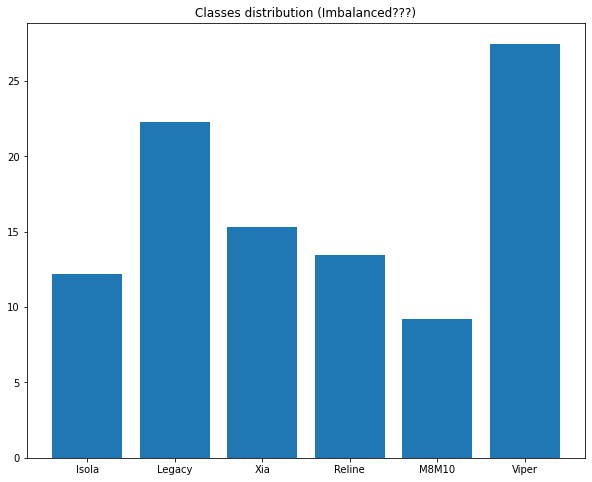

In [ ]:
# How many classes are there and what is the classes distribution?
labels = []
heights = []
for k in data_info.keys():
  n = data_info[k]['num_samples']
  print(f"Class: {k}.\t Samples: {n} ({100*n/total_samples:.2f}%)")
  
  labels.append(k)
  heights.append(round(100*n/total_samples, 2))

plt.figure(figsize=(10, 8))
plt.title("Classes distribution (Imbalanced???)")
plt.bar(labels, heights)
plt.show()

In [ ]:
# What are the image dimensions?
image_sizes = []
channels = []
for k in data_info.keys():
  image_sizes += data_info[k]["image_dims"]

print(f"{len(set(image_sizes))} unique image sizes out of {len(image_sizes)} images.")
print("We definitely need to resize all images to a common standard size.")

414 unique image sizes out of 542 images.
We definitely need to resize all images to a common standard size.


In [ ]:
dim1 = [d[0] for d in image_sizes]
dim2 = [d[1] for d in image_sizes]
dim3 = [d[2] for d in image_sizes if len(d) >= 3]
dim3 += [1 for d in image_sizes if len(d) < 3]
print(f"Min h={min(dim1)}, max h={max(dim1)}")
print(f"Min w={min(dim2)}, max w={max(dim2)}")
print(f"Min c={min(dim3)}, max c={max(dim3)}")

print(f"There are different types of images with 1 channel, 3 channels, and 4 channels.")
print("We need to convert them all to grayscale.")

Min h=119, max h=1406
Min w=78, max w=1348
Min c=1, max c=4
There are different types of images with 1 channel, 3 channels, and 4 channels.
We need to convert them all to grayscale.


In [ ]:
# future idea
# img = np.asarray(data_info["Isola"]["random_image"])
# h, w, _ = img.shape
# length = 78
# h0 = random.randint(0, h - length)
# w0 = random.randint(0, w - length)
# random_crop = img[h0:h0+length, w0:w0+length, :]
# random_crop = Image.fromarray(random_crop)
# random_crop

### Some basic findings:
- There are total 542 images which is very small for DL.
- Class: Isola.	 Samples: 66 (12.18%)
- Class: Legacy.	 Samples: 121 (22.32%)
- Class: Xia.	 Samples: 83 (15.31%)
- Class: Reline.	 Samples: 73 (13.47%)
- Class: M8M10.	 Samples: 50 (9.23%)
- Class: Viper.	 Samples: 149 (27.49%)
- 414 unique image sizes out of 542 images. We definitely need to resize all images to a common standard size.
- Min h=119, max h=1406; Min w=78, max w=1348; Min c=1, max c=4
- There are different types of images with 1 channel, 3 channels, and 4 channels.We need to convert them all to grayscale.

## Manual image inspections

### Isola

Very poor quality images. Or are they normal?


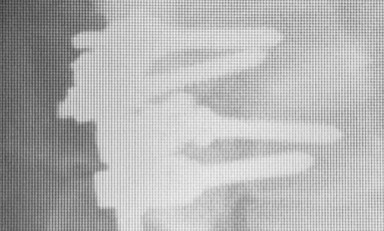

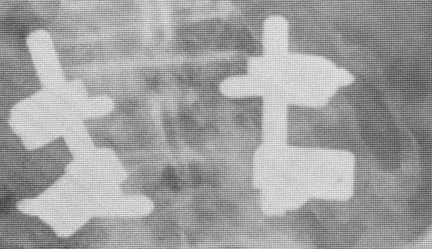

In [ ]:
# Isola
img_paths = ["data/train/Isola/s_104_2.jpg", "data/train/Isola/s_104_3.jpg"]
print("Very poor quality images. Or are they normal?")
for img_pth in img_paths:
  display(Image.open(img_pth))

### Legacy

Different color maps: white bg vs black bg.
Do we want to standardize them?


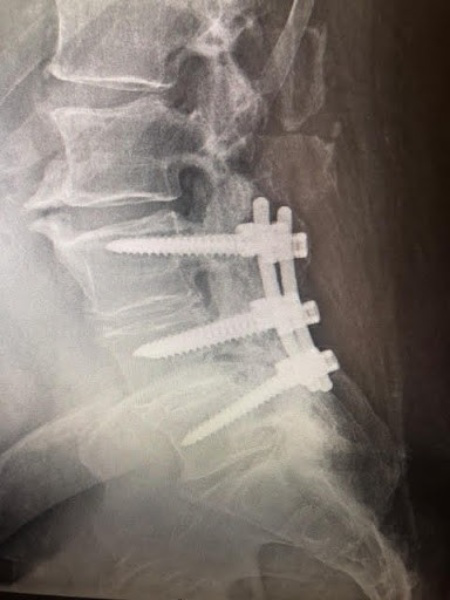

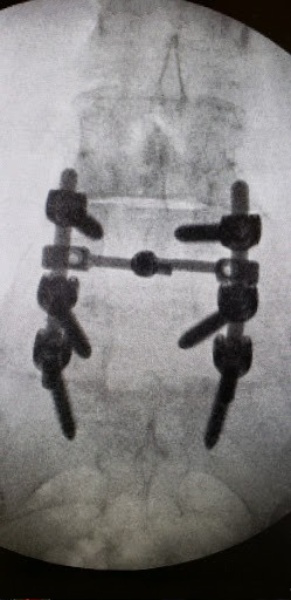

In [ ]:
# Legacy
img_paths = ["data/train/Legacy/18.jpg", "data/train/Legacy/19.jpg"]
print("Different color maps: white bg vs black bg.")
print("Do we want to standardize them?")
for img_pth in img_paths:
  display(Image.open(img_pth))

### M8M10

Did you notice the mouse pointer?


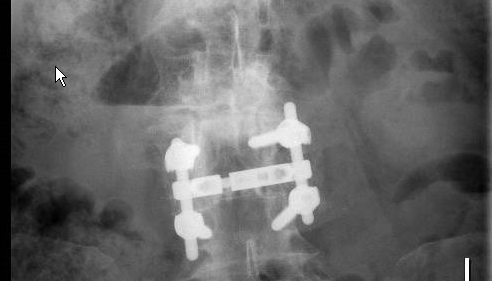

I do not know what this is.


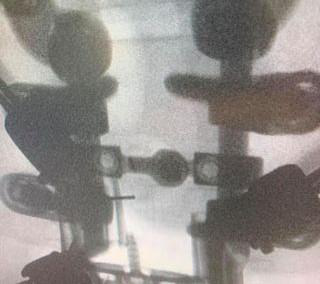

No comment for this image.


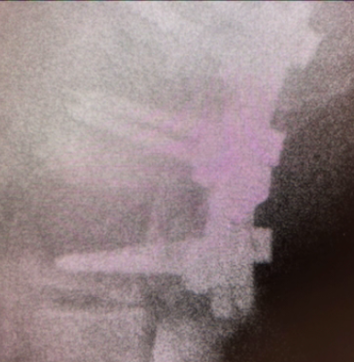

Again, no comment.


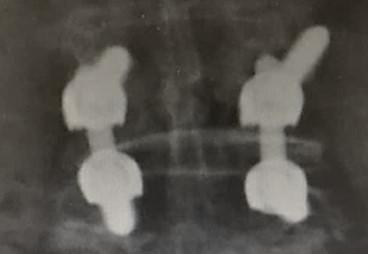

In [ ]:
# M8M10
img_paths = ["data/train/M8M10/10.png", 
             "data/train/M8M10/facebook_3648_AP_cropped.jpg",
             "data/train/M8M10/m8_consensus_xray2_cropped.png",
             "data/train/M8M10/s_171_2.jpg"]
comments = ["Did you notice the mouse pointer?",
            "I do not know what this is.",
            "No comment for this image.",
            "Again, no comment."]
for img_pth, cmt in zip(img_paths, comments):
  print(cmt)
  display(Image.open(img_pth))

### Reline

Are those are some kind of springs?


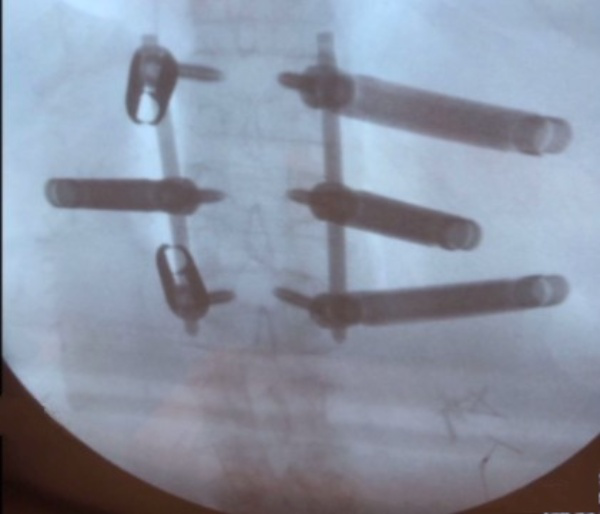

Can a human expert guess this type of implant?


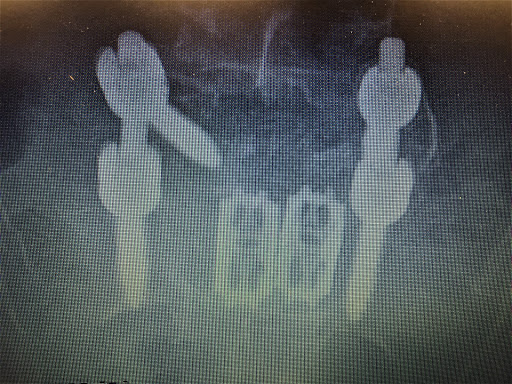

In [ ]:
# Reline
img_paths = ["data/train/Reline/reline_xray2.jpg", 
             "data/train/Reline/reline1_ap_email_22feb1829.jpg"]
comments = ["Are those are some kind of springs?", 
            "Can a human expert guess this type of implant?"]
for img_pth, cmt in zip(img_paths, comments):
  print(cmt)
  display(Image.open(img_pth))

### Viper

Is this really identifiable? What are the features?


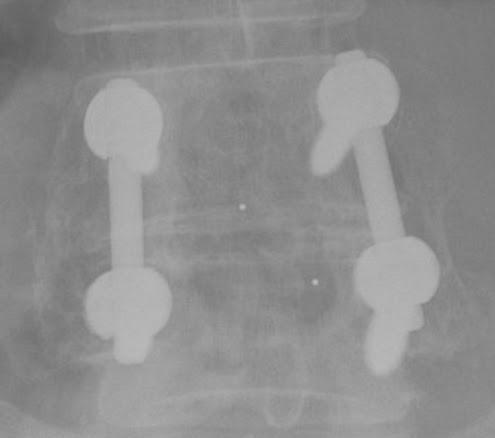

In [ ]:
# M8M10
img_paths = ["data/train/Viper/image002_test221_cropped.jpg"]
comments = ["Is this really identifiable? What are the features?"]
for img_pth, cmt in zip(img_paths, comments):
  print(cmt)
  display(Image.open(img_pth))

### Xia

Again, non-identifiable type.


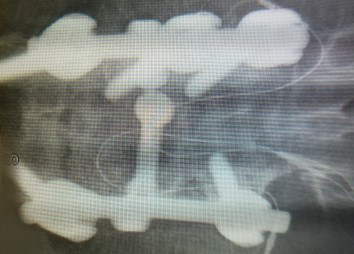

Same is here.


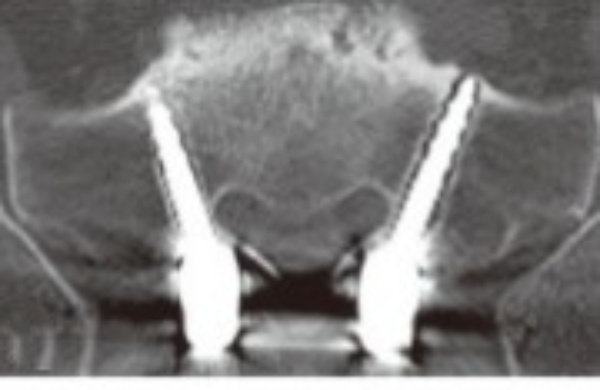

Non-identifiable and small.


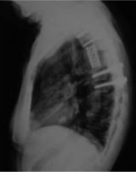

In [ ]:
# Xia
img_paths = ["data/train/Xia/s_257_4.jpg", 
             "data/train/Xia/xia2.jpg",
             "data/train/Xia/xia10.PNG"]
comments = ["Again, non-identifiable type.",
            "Same is here.",
            "Non-identifiable and small."]
for img_pth, cmt in zip(img_paths, comments):
  print(cmt)
  display(Image.open(img_pth))

## Some findings
- Images have a very poor quality.
- There are irrelevant objects, such as mouse pointer, in the images.
- Some image are nearly without any visible features.
- There is a difference in colormap. Some images display implant as black and background as white, while others display vice versa.

### Future recommendations
- Pre-process and standardize images to the same shape, colormap.
- Verify the quality of the data manually. Are the implants shown in the images are really the class they have been assigned to?
- Randomly select 10 images from each class and set this as a validation set.
- Don't look at test set for now.
- What is the simple baseline. The previous cohort's results may be used as a baseline. However, we can test our own simple baseline.
- Collect more data if possible.